# Regression Project on Video Game Sales

### Importing all the necessary modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt          
import datetime as dt 
import scipy.stats as stats
import statsmodels.formula.api as smf

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importing the dataset in Jupyter Notebook

In [2]:
VGSales = pd.read_csv('VideoGameSales.csv')

In [3]:
VGSales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
VGSales.shape

(16598, 11)

In [5]:
VGSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Checking the Duplicate Values

In [6]:
VGSales.duplicated().sum()

0

**We don't have any duplicate values in our data**

### Check if there are any Missing Values

In [7]:
VGSales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**There are missing values in our data. So we need to fill them.**

In [8]:
VGSales['Year'] = VGSales.Year.fillna(VGSales['Year'].median())

In [9]:
VGSales.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [10]:
VGSales['Publisher'] = VGSales.Publisher.fillna(VGSales['Publisher'].mode()[0])

In [11]:
VGSales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

**Now there are no missing values in our data and no duplicate values. So we can continue with further procedure.**

### Separating the DataFrame into Two Different DataFrames : Num_Data and Cat_Data

In [12]:
Num_Data = VGSales.select_dtypes(['int','float'])

In [13]:
Num_Data.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [14]:
Num_Data.shape

(16598, 7)

In [15]:
Cat_Data = VGSales.select_dtypes(['object'])

In [16]:
Cat_Data.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


In [17]:
Cat_Data.shape

(16598, 4)

In [18]:
Num_Data['index'] = Num_Data.index

In [19]:
Cat_Data['index'] = Cat_Data.index

In [20]:
Num_Data.head(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,index
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,1


In [21]:
Cat_Data.head(2)

,Name,Platform,Genre,Publisher,index
0,Wii Sports,Wii,Sports,Nintendo,0
1,Super Mario Bros.,NES,Platform,Nintendo,1


In [22]:
Num_Data.shape

(16598, 8)

In [23]:
Cat_Data.shape

(16598, 5)

In [24]:
Cat_Data.Genre.nunique()

12

In [25]:
Cat_Data.Genre.value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

<Axes: xlabel='Genre'>

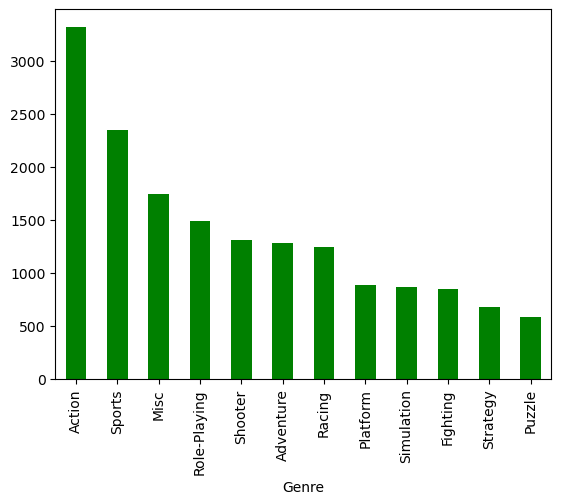

In [26]:
Cat_Data.Genre.value_counts().plot(kind = 'bar',color = ['green'])

In [27]:
Cat_Data.Publisher.nunique()

578

In [28]:
Cat_Data.Publisher.value_counts()

Publisher
Electronic Arts                 1409
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [29]:
Cat_Data.Platform.nunique()

31

In [30]:
Cat_Data.Platform.value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

<Axes: xlabel='Platform'>

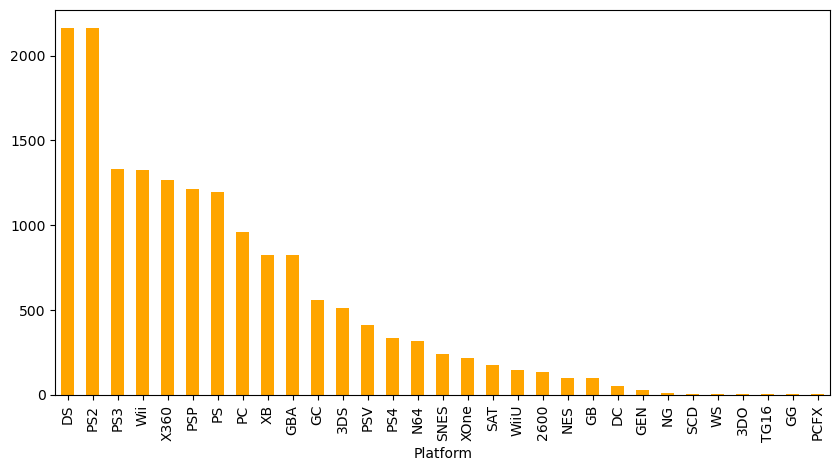

In [31]:
Cat_Data.Platform.value_counts().plot(kind = 'bar',color = ['orange'], figsize = (10,5))

# One-Hot Encoding

In [32]:
Cat_Data.columns

Index(['Name', 'Platform', 'Genre', 'Publisher', 'index'], dtype='object')

In [33]:
Cat_Data.shape

(16598, 5)

In [34]:
Cat_Data = pd.get_dummies(Cat_Data,columns =['Genre','Platform'],dtype=int)

In [35]:
Cat_Data.head()

,Name,Publisher,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,Nintendo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,Nintendo,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Nintendo,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Nintendo,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,Nintendo,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
Cat_Data.shape

(16598, 46)

We have Categorical Data in our Dataframe but we only need numerical, so we need remove these variables from our Dataframe

**Copying the Dataframe and drop the variables**

In [37]:
Cat_Data_copy = Cat_Data.copy()

In [38]:
Cat_Data.head()

,Name,Publisher,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,Nintendo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,Nintendo,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Nintendo,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Nintendo,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,Nintendo,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
Cat_Data_copy = Cat_Data_copy.drop(columns=['Name','Publisher'])

In [40]:
Cat_Data_copy.head()

,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
Cat_Data.head()

,Name,Publisher,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,Wii Sports,Nintendo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Super Mario Bros.,Nintendo,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mario Kart Wii,Nintendo,2,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,Nintendo,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Pokemon Red/Pokemon Blue,Nintendo,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
Cat_Data_copy.shape

(16598, 44)

### Now Merge both Num_Data and Cat_Data

In [43]:
Num_Data.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,index
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,1
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,2
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,3
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,4


In [44]:
Num_Data.shape

(16598, 8)

In [45]:
Cat_Data_copy.head()

,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Cat_Data_copy.shape

(16598, 44)

In [47]:
VGSales_1 = pd.merge(Num_Data,Cat_Data_copy,how = 'inner',left_on = 'index',right_on = 'index')

In [48]:
VGSales_1.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,index,Genre_Action,Genre_Adventure,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,3,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
VGSales_1.shape

(16598, 51)

In [50]:
VGSales_1_copy = VGSales_1.copy()

In [51]:
VGSales_1_copy['log_GS'] = np.log(VGSales_1_copy['Global_Sales'])

In [52]:
VGSales_1_copy.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,index,Genre_Action,Genre_Adventure,...,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,log_GS
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,...,0,0,0,0,1,0,0,0,0,4.415703
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,1,0,0,...,0,0,0,0,0,0,0,0,0,3.694862
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,2,0,0,...,0,0,0,0,1,0,0,0,0,3.578506
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,3,0,0,...,0,0,0,0,1,0,0,0,0,3.496508
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,4,0,0,...,0,0,0,0,0,0,0,0,0,3.445852


In [53]:
VGSales_1_copy = VGSales_1_copy.drop(columns='Global_Sales')

In [54]:
VGSales_1_copy.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,index,Genre_Action,Genre_Adventure,Genre_Fighting,...,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,log_GS
0,1,2006.0,41.49,29.02,3.77,8.46,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.415703
1,2,1985.0,29.08,3.58,6.81,0.77,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.694862
2,3,2008.0,15.85,12.88,3.79,3.31,2,0,0,0,...,0,0,0,0,1,0,0,0,0,3.578506
3,4,2009.0,15.75,11.01,3.28,2.96,3,0,0,0,...,0,0,0,0,1,0,0,0,0,3.496508
4,5,1996.0,11.27,8.89,10.22,1.00,4,0,0,0,...,0,0,0,0,0,0,0,0,0,3.445852


In [55]:
VGSales_1_copy['log_NA'] = np.log(VGSales_1_copy['NA_Sales'])

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [56]:
VGSales_1_copy['log_EU'] = np.log(VGSales_1_copy['EU_Sales'])

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
VGSales_1_copy['log_JP'] = np.log(VGSales_1_copy['JP_Sales'])

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [58]:
VGSales_1_copy['log_OS'] = np.log(VGSales_1_copy['Other_Sales'])

C:\Users\Dell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
VGSales_1_copy.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,index,Genre_Action,Genre_Adventure,Genre_Fighting,...,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,log_GS,log_NA,log_EU,log_JP,log_OS
0,1,2006.0,41.49,29.02,3.77,8.46,0,0,0,0,...,1,0,0,0,0,4.415703,3.725452,3.367985,1.327075,2.135349
1,2,1985.0,29.08,3.58,6.81,0.77,1,0,0,0,...,0,0,0,0,0,3.694862,3.370051,1.275363,1.918392,-0.261365
2,3,2008.0,15.85,12.88,3.79,3.31,2,0,0,0,...,1,0,0,0,0,3.578506,2.763170,2.555676,1.332366,1.196948
3,4,2009.0,15.75,11.01,3.28,2.96,3,0,0,0,...,1,0,0,0,0,3.496508,2.756840,2.398804,1.187843,1.085189
4,5,1996.0,11.27,8.89,10.22,1.00,4,0,0,0,...,0,0,0,0,0,3.445852,2.422144,2.184927,2.324347,0.000000


In [60]:
VGSales_1_copy = VGSales_1_copy.drop(columns='NA_Sales')

In [61]:
VGSales_1_copy = VGSales_1_copy.drop(columns='EU_Sales')

In [62]:
VGSales_1_copy = VGSales_1_copy.drop(columns='JP_Sales')

In [63]:
VGSales_1_copy = VGSales_1_copy.drop(columns='Other_Sales')

In [64]:
VGSales_1_copy.head()

,Rank,Year,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,...,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,log_GS,log_NA,log_EU,log_JP,log_OS
0,1,2006.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,4.415703,3.725452,3.367985,1.327075,2.135349
1,2,1985.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,3.694862,3.370051,1.275363,1.918392,-0.261365
2,3,2008.0,2,0,0,0,0,0,0,1,...,1,0,0,0,0,3.578506,2.763170,2.555676,1.332366,1.196948
3,4,2009.0,3,0,0,0,0,0,0,0,...,1,0,0,0,0,3.496508,2.756840,2.398804,1.187843,1.085189
4,5,1996.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,3.445852,2.422144,2.184927,2.324347,0.000000


In [65]:
VGSales_1_copy.shape

(16598, 51)

# Feature Engineering

### Correlation Analysis

In [66]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [67]:
VGSales_1 = VGSales_1.drop(columns = 'index')

In [68]:
corr = VGSales_1.corrwith(VGSales_1.Global_Sales).abs().sort_values(ascending = False)

In [69]:
corr

Global_Sales          1.000000
NA_Sales              0.941047
EU_Sales              0.902836
Other_Sales           0.748331
JP_Sales              0.611816
Rank                  0.427407
Platform_GB           0.102553
Platform_NES          0.100338
Year                  0.074807
Genre_Adventure       0.065521
Genre_Platform        0.061223
Platform_PSP          0.052942
Genre_Shooter         0.047899
Platform_X360         0.043821
Platform_PC           0.042677
Platform_PSV          0.039806
Platform_DS           0.039130
Genre_Strategy        0.037284
Platform_PS3          0.034774
Platform_XB           0.032927
Platform_Wii          0.030679
Platform_PS4          0.026829
Platform_SNES         0.023287
Platform_SAT          0.022656
Platform_GBA          0.022015
Platform_GC           0.021416
Genre_Role-Playing    0.017314
Genre_Misc            0.015770
Genre_Puzzle          0.014290
Platform_N64          0.013387
Platform_GEN          0.013315
Platform_PS           0.013168
Genre_Si

In [70]:
VG = corr[np.abs(corr)>0.05].index.difference(['Global_Sales'])

In [71]:
VG

Index(['EU_Sales', 'Genre_Adventure', 'Genre_Platform', 'JP_Sales', 'NA_Sales',
       'Other_Sales', 'Platform_GB', 'Platform_NES', 'Platform_PSP', 'Rank',
       'Year'],
      dtype='object')

In [72]:
VGSales_2 = VGSales_1.loc[ : ,['EU_Sales', 'Genre_Adventure', 'Genre_Platform','JP_Sales', 'NA_Sales','Other_Sales', 'Platform_GB','Platform_NES', 'Platform_PSP','Rank', 'Year']]

In [73]:
VGSales_2.head()

,EU_Sales,Genre_Adventure,Genre_Platform,JP_Sales,NA_Sales,Other_Sales,Platform_GB,Platform_NES,Platform_PSP,Rank,Year
0,29.02,0,0,3.77,41.49,8.46,0,0,0,1,2006.0
1,3.58,0,1,6.81,29.08,0.77,0,1,0,2,1985.0
2,12.88,0,0,3.79,15.85,3.31,0,0,0,3,2008.0
3,11.01,0,0,3.28,15.75,2.96,0,0,0,4,2009.0
4,8.89,0,0,10.22,11.27,1.00,1,0,0,5,1996.0


In [74]:
VGSales_2.shape

(16598, 11)

In [75]:
VGSales_1_copy.head(2)

,Rank,Year,index,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,log_GS,log_NA,log_EU,log_JP,log_OS
0,1,2006.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.415703,3.725452,3.367985,1.327075,2.135349
1,2,1985.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.694862,3.370051,1.275363,1.918392,-0.261365


In [76]:
VGSales_1_copy.shape

(16598, 51)

In [77]:
corr2 = VGSales_1_copy.corrwith(VGSales_1_copy.log_GS).abs().sort_values(ascending = False)

C:\Users\Dell\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [78]:
corr2

log_GS                1.000000
Rank                  0.983531
index                 0.983524
Genre_Adventure       0.195657
Year                  0.178581
Platform_PC           0.160712
Platform_PSP          0.123986
Platform_NES          0.110926
Platform_PSV          0.106056
Platform_DS           0.100673
Platform_X360         0.095155
Platform_PS3          0.089175
Platform_GB           0.088819
Genre_Strategy        0.076467
Platform_PS           0.076428
Genre_Platform        0.074254
Genre_Sports          0.067704
Platform_2600         0.064848
Genre_Shooter         0.062207
Platform_PS2          0.060497
Genre_Puzzle          0.050539
Platform_N64          0.050536
Platform_SNES         0.049453
Platform_Wii          0.035311
Genre_Action          0.030309
Genre_Fighting        0.029544
Platform_3DS          0.028121
Platform_PS4          0.025716
Platform_XB           0.023645
Platform_GBA          0.021084
Platform_SAT          0.020978
Platform_XOne         0.020054
Genre_Ra

In [79]:
VGSales_1_copy = VGSales_1_copy.drop(columns = 'index')

In [80]:
VGSales_1_copy.head()

,Rank,Year,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,log_GS,log_NA,log_EU,log_JP,log_OS
0,1,2006.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.415703,3.725452,3.367985,1.327075,2.135349
1,2,1985.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.694862,3.370051,1.275363,1.918392,-0.261365
2,3,2008.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.578506,2.763170,2.555676,1.332366,1.196948
3,4,2009.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.496508,2.756840,2.398804,1.187843,1.085189
4,5,1996.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.445852,2.422144,2.184927,2.324347,0.000000


In [81]:
VGSales_1_copy.shape

(16598, 50)

In [82]:
VG_1 = corr2[np.abs(corr2)>0.05].index.difference(['log_GS'])

In [83]:
VG_1

Index(['Genre_Adventure', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Shooter',
       'Genre_Sports', 'Genre_Strategy', 'Platform_2600', 'Platform_DS',
       'Platform_GB', 'Platform_N64', 'Platform_NES', 'Platform_PC',
       'Platform_PS', 'Platform_PS2', 'Platform_PS3', 'Platform_PSP',
       'Platform_PSV', 'Platform_X360', 'Rank', 'Year', 'index'],
      dtype='object')

In [84]:
VG_1_copy = VGSales_1_copy.loc[ : : ,['Genre_Adventure', 'Genre_Platform','Genre_Puzzle', 'Genre_Shooter','Genre_Sports', 'Genre_Strategy','Platform_2600', 'Platform_DS', 'Platform_GB','Platform_N64', 'Platform_NES','Platform_PC', 'Platform_PS','Platform_PS2', 'Platform_PS3','Platform_PSP', 'Platform_PSV', 'Platform_X360','Rank', 'Year']]

In [85]:
VG_1_copy.head()

,Genre_Adventure,Genre_Platform,Genre_Puzzle,Genre_Shooter,Genre_Sports,Genre_Strategy,Platform_2600,Platform_DS,Platform_GB,Platform_N64,Platform_NES,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PSP,Platform_PSV,Platform_X360,Rank,Year
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2006.0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1985.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2008.0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2009.0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,1996.0


In [86]:
VG_1_copy.shape

(16598, 20)

# Splitting the final dataset into Training and Testing dataset

In [87]:
import sklearn

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
VGSales_2['Global_Sales'] = VGSales_1['Global_Sales']

In [90]:
train,test = train_test_split(VGSales_2,test_size = 0.3, random_state = 123)

In [91]:
train.shape

(11618, 12)

In [92]:
test.shape

(4980, 12)

In [93]:
VG_1_copy['log_Global_Sales'] = VGSales_1_copy['log_GS']

In [94]:
log_train,log_test = train_test_split(VG_1_copy,test_size = 0.3, random_state = 123)

In [95]:
log_train.shape

(11618, 21)

In [96]:
log_test.shape

(4980, 21)

# Building the Regression model

In [97]:
formula = 'Global_Sales~' + '+'.join(train.columns.difference(['Global_Sales']))

In [98]:
formula2 = 'Global_Sales~' + '+'.join(train.columns.difference(['Global_Sales', 'Platform_GB']))

In [99]:
formula3 = 'Global_Sales~' + '+'.join(train.columns.difference(['Global_Sales', 'Platform_GB', 'Genre_Platform']))

In [100]:
formula4 = 'Global_Sales~' + '+'.join(train.columns.difference(['Global_Sales', 'Platform_GB', 'Genre_Platform', 'Platform_NES']))

In [101]:
formula5 = 'Global_Sales~' + '+'.join(train.columns.difference(['Global_Sales', 'Platform_GB', 'Genre_Platform', 'Platform_NES', 'Year']))

In [102]:
formula6 = 'Global_Sales~' + '+'.join(train.columns.difference(['Global_Sales', 'Platform_GB', 'Genre_Platform', 'Platform_NES', 'Year', 'Genre_Adventure']))

In [103]:
from sklearn import datasets, linear_model

In [104]:
formula6

'Global_Sales~EU_Sales+JP_Sales+NA_Sales+Other_Sales+Platform_PSP+Rank'

In [105]:
model = smf.ols(formula6, train).fit()

In [106]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.830e+08
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:40:21   Log-Likelihood:                 44586.
No. Observations:               11618   AIC:                        -8.916e+04
Df Residuals:                   11611   BIC:                        -8.911e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0003      0.000     -2.753   

In [107]:
pred_Global_Sales = model.predict(train)

In [108]:
pred_Global_Sales

6061      0.290159
424       3.189049
3828      0.519982
10797     0.100522
13700     0.040761
7282      0.220223
1855      1.089814
6130      0.290166
12569     0.050679
12422     0.060668
2797      0.729908
7469      0.210240
9849      0.120444
721       2.229733
2889      0.699927
9706      0.130452
1745      1.159809
15675     0.010924
8225      0.170338
4096      0.490003
2448      0.839794
9062      0.140404
16350     0.010529
5398      0.340114
11308     0.090577
4219      0.470009
3927      0.509994
8924      0.160391
7578      0.199804
1908      1.079823
16128     0.010960
6346      0.270188
4921      0.390076
2652      0.779884
13183     0.050727
10928     0.100547
135       6.309468
6853      0.240226
14339     0.030814
6080      0.290160
12766     0.060696
8633      0.160341
4075      0.479997
3341      0.599396
5269      0.360100
12311     0.060649
9068      0.140402
15632     0.010921
7909      0.180313
1449      1.349157
9337      0.130402
5548      0.330107
2759      0.

In [109]:
train['Global_Sales']

6061      0.29
424       3.19
3828      0.52
10797     0.10
13700     0.04
7282      0.22
1855      1.10
6130      0.28
12569     0.06
12422     0.06
2797      0.73
7469      0.21
9849      0.12
721       2.23
2889      0.71
9706      0.12
1745      1.16
15675     0.02
8225      0.17
4096      0.48
2448      0.85
9062      0.14
16350     0.01
5398      0.34
11308     0.08
4219      0.47
3927      0.51
8924      0.15
7578      0.20
1908      1.08
16128     0.01
6346      0.27
4921      0.39
2652      0.78
13183     0.05
10928     0.09
135       6.31
6853      0.24
14339     0.03
6080      0.29
12766     0.06
8633      0.16
4075      0.49
3341      0.60
5269      0.35
12311     0.06
9068      0.14
15632     0.02
7909      0.19
1449      1.35
9337      0.13
5548      0.33
2759      0.75
938       1.85
11100     0.09
12894     0.05
14071     0.04
587       2.60
13632     0.04
16123     0.01
10163     0.11
4648      0.42
9113      0.14
2801      0.73
9643      0.13
4397      0.45
12922     

In [110]:
Result = pd.DataFrame(pd.concat([train['Global_Sales'],pred_Global_Sales],axis = 1))

In [111]:
Result = Result.rename(columns = {0:'Prediction'})

In [112]:
Result.head()

,Global_Sales,Prediction
6061,0.29,0.290159
424,3.19,3.189049
3828,0.52,0.519982
10797,0.10,0.100522
13700,0.04,0.040761


In [113]:
Result['Error'] = np.abs(Result['Global_Sales'] - Result['Prediction'])

In [114]:
Result.head()

,Global_Sales,Prediction,Error
6061,0.29,0.290159,0.000159
424,3.19,3.189049,0.000951
3828,0.52,0.519982,0.000018
10797,0.10,0.100522,0.000522
13700,0.04,0.040761,0.000761


In [115]:
Result['Percent_Error'] = (Result['Error']/Result['Global_Sales'])*100

In [116]:
Result.head()

,Global_Sales,Prediction,Error,Percent_Error
6061,0.29,0.290159,0.000159,0.054800
424,3.19,3.189049,0.000951,0.029808
3828,0.52,0.519982,0.000018,0.003435
10797,0.10,0.100522,0.000522,0.522117
13700,0.04,0.040761,0.000761,1.903624


In [117]:
MAPE = np.round(np.mean(Result['Percent_Error']),2)

In [118]:
MAPE

3.29

**MAPE error is less than 10-12%. So we can say it is a very good regression model.**